# 3 Exploratory Data Analysis (EDA)

## 3.1 Contents
## 3.2 Introduction
## 3.3 Imports
## 3.4 Load Data 
## 3.5 Data Exploration
        3.5.1 Conversion & Time Plots
              3.5.1.1 Dealership Time Plot 
              3.5.1.2 Lexus Time Plot 
        3.5.2 Seasonal Plots
              3.5.2.1 Dealership Seasonal Plot
              3.5.2.2 Lexus Seasonal Plot
        3.5.3 Time Series Decompositions
              3.5.3.1 Dealership Time Series Decomposition
              3.5.3.2 Lexus Time Series Decomposition
        3.5.4 Identifying Top Vehicle Makes & Models
## 3.6 Statistical Inference
        3.6.1 One-Way ANOVA F-test
              3.6.1.1 Exploring Distributions of Observations
        3.6.2 Post-Hoc Test: Tukey's Honestly Significant Difference Test (Tukey HSD)
        3.6.3 Augmented Dickey Fuller (ADF) Test
        3.6.4 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
        3.6.5 Handling Heteroskedasticity
        3.6.6 Removing Trends
        3.6.7 Removing Seasonality
## 3.7 Save File
## 3.8 Summary

## 3.2 Introduction

After completing the data wrangling of the Historical Sales Data dataset, it is now time to examine the target variable *ContractDate* and the total sales observed within this time period. Once a time plot is graphed it will be examined for if there are consistent patterns? If there is a significant trend? If seasonality is important? If there is evidence of the presence of business cycles? If there are any outliers in the data that need to be explained by those with expert knowledge? How strong are the relationships among the variables available for analysis? 

## 3.3 Imports

In [1]:
from pandas import read_csv
import datetime
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from scipy.stats import boxcox,skew,yeojohnson
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.stats.multicomp import MultiComparison

## 3.4 Load Data

In [2]:
#csv file in subdirectory 'interim'  
shc = read_csv('../data/interim/Sales_Hist_Clean.csv')
shc

,DealNumber,ContractDate,InventoryType,VIN,VehicleMake,VehicleModel,VehicleModelYear,VehicleSalePrice,TotalGrossProfit,BackEndGrossProfit,...,BuyerHomeAddressState,BuyerHomeAddressPostalCode,Trade1_VIN,Trade1_Year,Trade1_Make,Trade1_Model,Trade2_VIN,Trade2_Year,Trade2_Make,Trade2_Model
0,10029,2011-01-12,U,2T2HK31U49C118454,Lexus,RX 350,2009,36500.0,4985.75,200.00,...,DE,199704516,YV1CM59H331013308,2003.0,Volvo,XC90,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,10035,2011-01-10,U,JTHCE96S580017706,Lexus,GS 350,2008,34995.0,3028.39,0.00,...,IN,466149383,1FTWW31P95EB23344,2005.0,Ford,F-350,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,10036,2011-01-11,N,JTHDL5EF0B5003231,Lexus,LS 460,2011,82150.0,6481.00,0.00,...,IN,465061850,JTHBL46F385052674,2008.0,Lexus,LS 460,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,10037,2011-01-14,N,JTJBK1BA2B2013626,Lexus,RX 350,2011,42921.0,3087.00,0.00,...,IN,465308309,1HGCD5666SA119678,1995.0,Honda,Accord,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,10057,2011-01-14,U,JTJHK31U082048420,Lexus,RX 350,2008,31888.0,3461.87,0.00,...,IN,465146138,1FMDU34X1VUC98892,1997.0,Ford,Explorer,Not Applicable,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,9855,2010-12-31,U,JTHBJ46G582238457,Lexus,ES 350,2008,24500.0,617.71,639.60,...,IN,465618879,JHLRE48747C075135,2007.0,Honda,CR-V,Not Applicable,Not Applicable,Not Applicable,Not Applicable
8204,9857,2010-12-31,U,2T2HA31U06C096127,Lexus,RX 330,2006,23600.0,2916.00,0.00,...,IN,466151140,JTJHF10U830298468,2003.0,Lexus,RX 300,WDBNG75J51A173941,2001.0,Mercedes-Benz,S500
8205,9859,2010-12-31,N,2T2BK1BA1BC088155,Lexus,RX 350,2011,41821.0,2139.60,252.60,...,IN,465307865,JT6HF10U1Y0126767,2000.0,Lexus,RX 300,Not Applicable,Not Applicable,Not Applicable,Not Applicable
8206,989,2006-08-31,U,2T2HA31U15C080582,Lexus,RX 330,2005,34500.0,2928.22,446.85,...,IN,465307078,1G4CW54K724194862,2002.0,Buick,Park Avenue,Not Applicable,Not Applicable,Not Applicable,Not Applicable


## 3.5 Data Exploration

### 3.5.1 Conversion & Time Plots

For time series data, the obvious graph to start with is a time plot. A time plot allows us to observe strange values like outliers, periods of missing observations, fluctuations within the data, and the potential trend, seasonality, and or cyclic behavior of the time series.

#### 3.5.1.1 Dealership Time Plot

In [3]:
#break out year and month data
shc['ContractDate'] = pd.to_datetime(shc['ContractDate'])
shc['ContractYearMonth'] = shc['ContractDate'].dt.strftime('%Y-%m')
shc.head(20)

,DealNumber,ContractDate,InventoryType,VIN,VehicleMake,VehicleModel,VehicleModelYear,VehicleSalePrice,TotalGrossProfit,BackEndGrossProfit,...,BuyerHomeAddressPostalCode,Trade1_VIN,Trade1_Year,Trade1_Make,Trade1_Model,Trade2_VIN,Trade2_Year,Trade2_Make,Trade2_Model,ContractYearMonth
0,10029,2011-01-12,U,2T2HK31U49C118454,Lexus,RX 350,2009,36500.00,4985.75,200.00,...,199704516,YV1CM59H331013308,2003.0,Volvo,XC90,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
1,10035,2011-01-10,U,JTHCE96S580017706,Lexus,GS 350,2008,34995.00,3028.39,0.00,...,466149383,1FTWW31P95EB23344,2005.0,Ford,F-350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
2,10036,2011-01-11,N,JTHDL5EF0B5003231,Lexus,LS 460,2011,82150.00,6481.00,0.00,...,465061850,JTHBL46F385052674,2008.0,Lexus,LS 460,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
3,10037,2011-01-14,N,JTJBK1BA2B2013626,Lexus,RX 350,2011,42921.00,3087.00,0.00,...,465308309,1HGCD5666SA119678,1995.0,Honda,Accord,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
4,10057,2011-01-14,U,JTJHK31U082048420,Lexus,RX 350,2008,31888.00,3461.87,0.00,...,465146138,1FMDU34X1VUC98892,1997.0,Ford,Explorer,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
5,10059,2011-01-14,U,1NXBR32E55Z545986,Toyota,Corolla,2005,10719.00,3755.17,0.00,...,465146068,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
6,10060,2011-01-14,N,2T2BK1BA7BC087463,Lexus,RX 350,2011,45921.00,2157.19,241.48,...,490853438,2T2HK31U08C049602,2008.0,Lexus,RX 350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
7,10067,2011-01-17,U,JTHBL46F385052674,Lexus,LS 460,2008,43995.00,5988.73,612.36,...,46390,JTHCE96S570011550,2007.0,Lexus,GS 350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
8,10068,2011-01-17,U,JTJBT20X780158790,Lexus,GX 470,2008,42000.00,4825.26,150.00,...,491128449,WA1EY74L57D059909,2007.0,Audi,Q7,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
9,10072,2011-01-18,U,2T2HA31U36C108786,Lexus,RX 330,2006,26995.00,4128.71,508.05,...,466141605,3N1CB51D94L836617,2004.0,Nissan,Sentra,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01


In [4]:
#Grouping and perform count over each time period of sales
year_mnth_num = shc.groupby('ContractYearMonth')['ContractYearMonth'].count()
print(year_mnth_num)

ContractYearMonth
2004-06    53
2004-07    53
2004-08    79
2004-09    64
2004-10    81
           ..
2016-11    37
2016-12    52
2017-01    36
2017-02    33
2017-03    45
Name: ContractYearMonth, Length: 154, dtype: int64


In [5]:
#save as new df of total sales
df_total_sales = pd.DataFrame(year_mnth_num.reset_index(name = "TotalSales"))
df_total_sales

,ContractYearMonth,TotalSales
0,2004-06,53
1,2004-07,53
2,2004-08,79
3,2004-09,64
4,2004-10,81
...,...,...
149,2016-11,37
150,2016-12,52
151,2017-01,36
152,2017-02,33


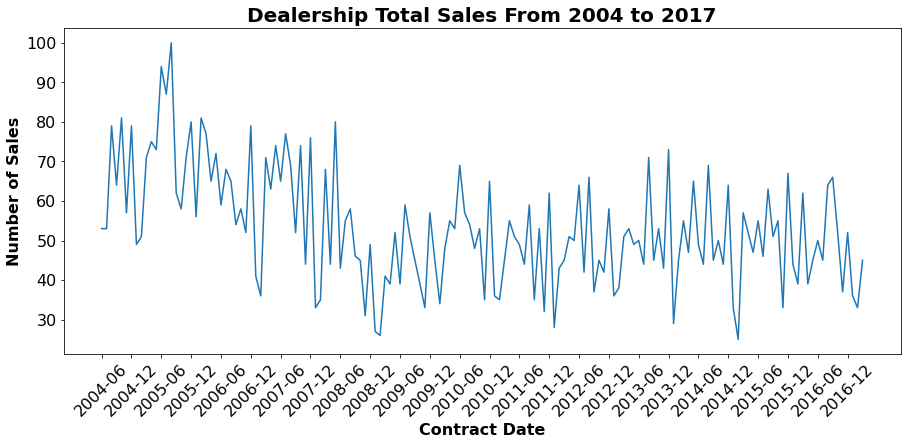

In [6]:
#graph time plot of data to examine vehicle sales yearly/monthly
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(df_total_sales['ContractYearMonth'], df_total_sales['TotalSales'])
x_ticks = np.arange(0,153,6) #start at index 0, stop at 153, and step up by 6
plt.xticks(x_ticks, rotation = 45)

ax.set_title('Dealership Total Sales From 2004 to 2017', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Contract Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

The time plot of the dealership's total sells shows strong seasonality within each year, as well as some strong cyclic behavior with a period of about 2–4 years. There is a downward trend in the data beginning mid to late 2007.

In addition, 2005 appears to have outliers and values which need to be explained because they differ from the seasonality or trend of any other year. There are missing observations from January to May of 2004 and April of 2017 and onward. Also there is a clear decreasing fluctuation in 2008, which is also during the last year of financial crisis of 2007-2008 in the United States, and again in 2014.

#### 3.5.1.2 Lexus Time Plot

In [7]:
#new df for only lexus sales
lex_sales = shc.loc[(shc['VehicleMake']=='Lexus')]
lex_sales

,DealNumber,ContractDate,InventoryType,VIN,VehicleMake,VehicleModel,VehicleModelYear,VehicleSalePrice,TotalGrossProfit,BackEndGrossProfit,...,BuyerHomeAddressPostalCode,Trade1_VIN,Trade1_Year,Trade1_Make,Trade1_Model,Trade2_VIN,Trade2_Year,Trade2_Make,Trade2_Model,ContractYearMonth
0,10029,2011-01-12,U,2T2HK31U49C118454,Lexus,RX 350,2009,36500.0,4985.75,200.00,...,199704516,YV1CM59H331013308,2003.0,Volvo,XC90,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
1,10035,2011-01-10,U,JTHCE96S580017706,Lexus,GS 350,2008,34995.0,3028.39,0.00,...,466149383,1FTWW31P95EB23344,2005.0,Ford,F-350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
2,10036,2011-01-11,N,JTHDL5EF0B5003231,Lexus,LS 460,2011,82150.0,6481.00,0.00,...,465061850,JTHBL46F385052674,2008.0,Lexus,LS 460,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
3,10037,2011-01-14,N,JTJBK1BA2B2013626,Lexus,RX 350,2011,42921.0,3087.00,0.00,...,465308309,1HGCD5666SA119678,1995.0,Honda,Accord,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
4,10057,2011-01-14,U,JTJHK31U082048420,Lexus,RX 350,2008,31888.0,3461.87,0.00,...,465146138,1FMDU34X1VUC98892,1997.0,Ford,Explorer,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,9855,2010-12-31,U,JTHBJ46G582238457,Lexus,ES 350,2008,24500.0,617.71,639.60,...,465618879,JHLRE48747C075135,2007.0,Honda,CR-V,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2010-12
8204,9857,2010-12-31,U,2T2HA31U06C096127,Lexus,RX 330,2006,23600.0,2916.00,0.00,...,466151140,JTJHF10U830298468,2003.0,Lexus,RX 300,WDBNG75J51A173941,2001.0,Mercedes-Benz,S500,2010-12
8205,9859,2010-12-31,N,2T2BK1BA1BC088155,Lexus,RX 350,2011,41821.0,2139.60,252.60,...,465307865,JT6HF10U1Y0126767,2000.0,Lexus,RX 300,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2010-12
8206,989,2006-08-31,U,2T2HA31U15C080582,Lexus,RX 330,2005,34500.0,2928.22,446.85,...,465307078,1G4CW54K724194862,2002.0,Buick,Park Avenue,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2006-08


In [8]:
#Grouping and perform count over each time period of sales
lex_year_mnth = lex_sales.groupby('ContractYearMonth')['ContractYearMonth'].count()
print(lex_year_mnth)

ContractYearMonth
2004-06    37
2004-07    35
2004-08    60
2004-09    44
2004-10    58
           ..
2016-11    31
2016-12    43
2017-01    30
2017-02    24
2017-03    32
Name: ContractYearMonth, Length: 154, dtype: int64


In [9]:
#save as new df of lex_year_mnth
lex = pd.DataFrame(lex_year_mnth.reset_index(name = "TotalSales"))
lex

,ContractYearMonth,TotalSales
0,2004-06,37
1,2004-07,35
2,2004-08,60
3,2004-09,44
4,2004-10,58
...,...,...
149,2016-11,31
150,2016-12,43
151,2017-01,30
152,2017-02,24


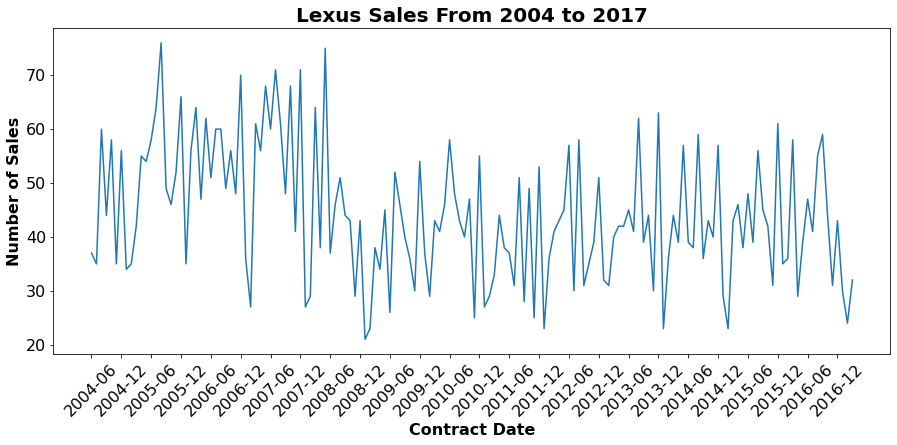

In [10]:
#graph time plot of data to examine vehicle sales yearly/monthly for lexus vehicles only
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(lex['ContractYearMonth'], lex['TotalSales'])
x_ticks = np.arange(0,153,6) #start at index 0, stop at 153, and step up by 6
plt.xticks(x_ticks, rotation = 45)

ax.set_title('Lexus Sales From 2004 to 2017', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Contract Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

From this time plot we can the strong seasonality within each year, as seen in the dealership total sales time plot. The downward trend observed in the dealership total sales time plot is even more obvious when examining Lexus vehicle sales exclusively. The same downward trend appears to begin in the first quarter of 2008 with it's lowest plunge at the start of 2009. 

In addition, 2005 and 2006, as seen in the dealership total sales time plot, still appear to have outliers and values which need to be explained because they differ from the seasonality or trend of any other years. There are also missing observations from January to May of 2004 and the second quarter of 2017 and onward. Also there is a clear decreasing fluctuation in in the third quarter of 2008, which coincides with the financial crisis of 2007-2008 in the United States.

### 3.5.2 Seasonal Plots

A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. The data for each season are overlapped. 

A seasonal plot consists of three parts: the seasonality plotted as a line graph, the trend behavior plotted yearly as a box plot, and the seasonality again plotted monthly but as a box plot. 

Plotting the seasonality as a line graph allows us to observe more clearly the seasonal pattern if it exists monthly, the years in which the pattern changes, and any large jumps or drops in the time series. The trend and seasonality box plots allows the trend and the seasonality to be seen more clearly from a different perspective, observe if there are any years or months with outliers, and compare years or months easier if necessary.

#### 3.5.2.1 Dealership Seasonal Plot

In [11]:
#prepare for seasonal plot by seperating month and year of ContractDate from "df_total_sales" df
df_ts_yr_mnth = df_total_sales.copy()
df_ts_yr_mnth['ContractYearMonth'] = pd.to_datetime(df_ts_yr_mnth['ContractYearMonth'])
df_ts_yr_mnth['ContractYear'] = df_ts_yr_mnth['ContractYearMonth'].dt.year
df_ts_yr_mnth['ContractMonth'] = df_ts_yr_mnth['ContractYearMonth'].dt.month
df_ts_yr_mnth

,ContractYearMonth,TotalSales,ContractYear,ContractMonth
0,2004-06-01,53,2004,6
1,2004-07-01,53,2004,7
2,2004-08-01,79,2004,8
3,2004-09-01,64,2004,9
4,2004-10-01,81,2004,10
...,...,...,...,...
149,2016-11-01,37,2016,11
150,2016-12-01,52,2016,12
151,2017-01-01,36,2017,1
152,2017-02-01,33,2017,2


Text(0, 0.5, 'Number of Sales')

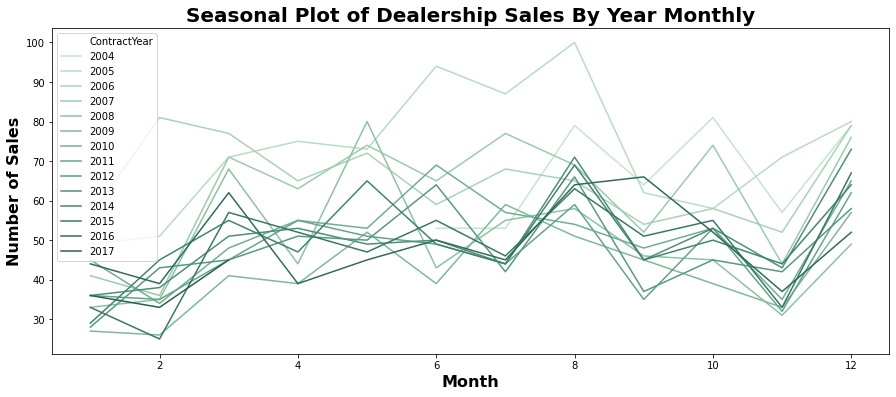

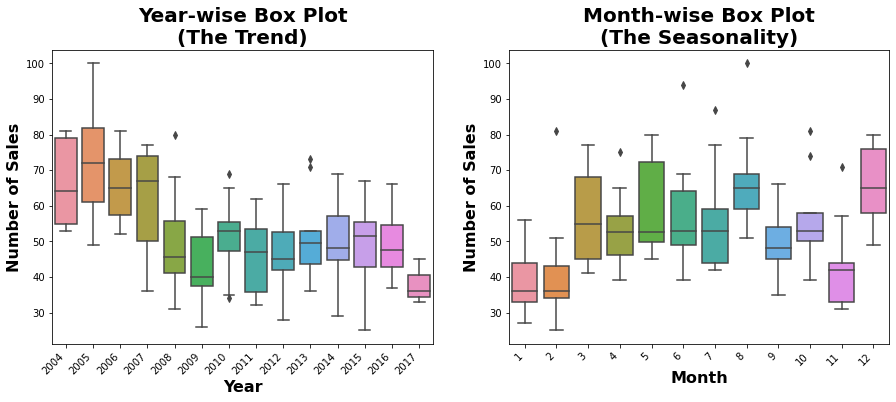

In [12]:
#seasonal plot of dealership sales
variable = 'TotalSales'
fig, ax = plt.subplots(figsize=(15, 6))
#line plot
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 14)#14 refers to the number of years plotted
sns.lineplot(df_ts_yr_mnth['ContractMonth'], df_ts_yr_mnth[variable], hue=df_ts_yr_mnth['ContractYear'], palette=palette)
ax.set_title('Seasonal Plot of Dealership Sales By Year Monthly', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
#boxplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.autofmt_xdate(rotation=45) #auto rotates all x_tick labels 45 degrees
#yearly
sns.boxplot(df_ts_yr_mnth['ContractYear'], df_ts_yr_mnth[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
#monthly
sns.boxplot(df_ts_yr_mnth['ContractMonth'], df_ts_yr_mnth[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))

In the **seasonal line plot** there is a clear pattern of seasonal trend occuring every two months. March, August, and December are typically in increasing fluctuantion, while February, September, November are always in decreasing fluctation. As early as March Lexus dealerships begin to receive the new models for the year. August is the start of the new school year for many high schools and universities where a student vehicle is typical. Lastly, December is the month of Lexus' largest sales campaign, 'December to Remember'. These may be reasons why sales are typically in an increasing fluctuation during these months. February is a short month which could effect number of selling days for the sales team and consumers are spending their money on Valentine's Day gifts. September is the first month after the summer months when people vacation and after the school year has begun. November is in the same month as one of the most expensive holidays, Thanksgiving. For these reasons this may be why a decreasing fluctuation is typical for these months. 

In the year-wise **trend box plot** clear outliers can be seen in 2008, 2010, and 2013. Overall, it appears sales from 2004 to 2007 typical fall between 35 to 85 units sold, except for in 2005, where total sells exceed the typical range as observed in this cyclical pattern. 2008 is the beginning of a new cyclical pattern that appears to last 2 years with a staggering decrease in total unit sells between 25 to the high 60s. Curious to know if the outlier in 2008 at 80 units was in the first quarter of the year. There is a increase in sales in 2010, but then a return to cyclical pattern started in 2008 with sales ranging between 25 to high 60s for the remaing 5 years of data.

In the month-wise **seasonality box plot** there are outliers in February(2), April(4), June(6), July(7), August(8), October(10), and November(11). January(1) and February(2) typically have the lowest total sales, with Febraury as the lowest and December has the highest. From this plot, we now know the outlier we see in February occurred somwhere between 2004 to 2007, the outliers we see for June through August, belong to 2005, and the outliers for October and November occured between 2004 to 2007 or in 2013.

In conclusion, there is a clear downward trend yearly beginning in 2006 and a clear increasing fluctuantion seasonally throughout the first two quarters of the year for the sale of all dealership vehicles.

#### 3.5.2.2 Lexus Seasonal Plot

In [13]:
#prepare for seasonal plot by seperating month and year of ContractDate from "lex" df.
lex_ts_yr_mnth = lex.copy()
lex_ts_yr_mnth['ContractYearMonth'] = pd.to_datetime(lex_ts_yr_mnth['ContractYearMonth'])
lex_ts_yr_mnth['ContractYear'] = lex_ts_yr_mnth['ContractYearMonth'].dt.year
lex_ts_yr_mnth['ContractMonth'] = lex_ts_yr_mnth['ContractYearMonth'].dt.month
lex_ts_yr_mnth

,ContractYearMonth,TotalSales,ContractYear,ContractMonth
0,2004-06-01,37,2004,6
1,2004-07-01,35,2004,7
2,2004-08-01,60,2004,8
3,2004-09-01,44,2004,9
4,2004-10-01,58,2004,10
...,...,...,...,...
149,2016-11-01,31,2016,11
150,2016-12-01,43,2016,12
151,2017-01-01,30,2017,1
152,2017-02-01,24,2017,2


Text(0, 0.5, 'Number of Sales')

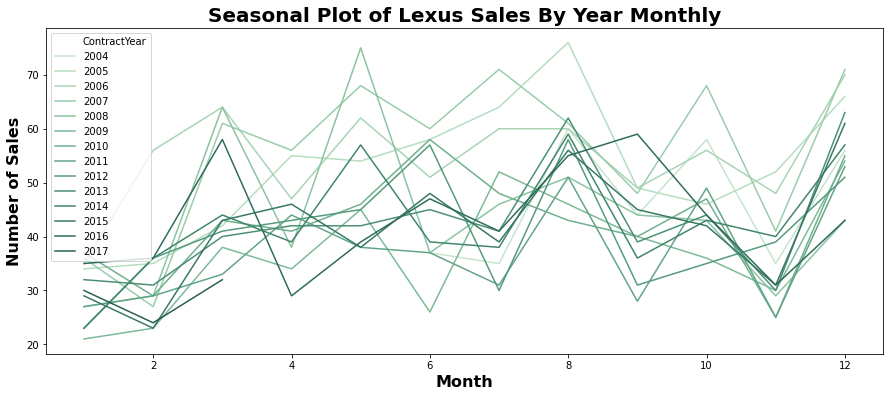

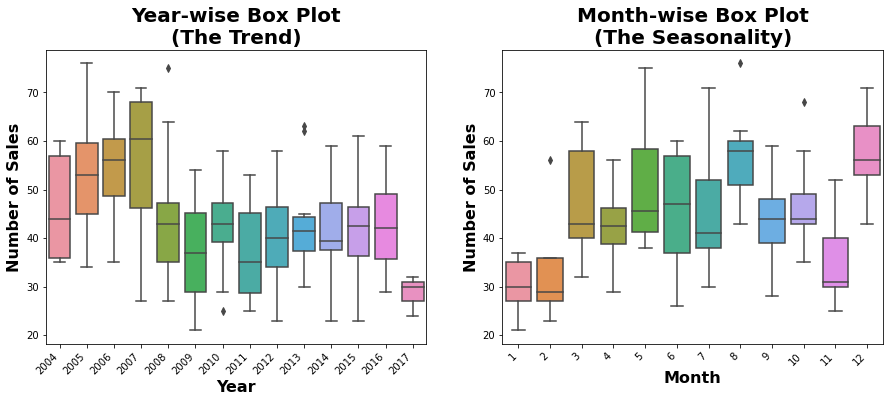

In [14]:
#seasonal plot of lexus sales
variable = 'TotalSales'
fig, ax = plt.subplots(figsize=(15, 6))
#line plot
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 14)#14 refers to the number of years plotted
sns.lineplot(lex_ts_yr_mnth['ContractMonth'], lex_ts_yr_mnth[variable], hue=lex_ts_yr_mnth['ContractYear'], palette=palette)
ax.set_title('Seasonal Plot of Lexus Sales By Year Monthly', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
#boxplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.autofmt_xdate(rotation=45) #auto rotates all x_tick labels 45 degrees
#yearly
sns.boxplot(lex_ts_yr_mnth['ContractYear'], lex_ts_yr_mnth[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))
#monthly
sns.boxplot(lex_ts_yr_mnth['ContractMonth'], lex_ts_yr_mnth[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Number of Sales', fontsize = 16, fontdict=dict(weight='bold'))

In the **seasonal line plot** there is a clear pattern of seasonal trend occuring approximately every two months, except for June, which appeared to change from a decreasing fluctuantion from 2004 onward until it becomes an increasing fluctuantion from 2014 through 2016. The months of March, May, August, October, and December appear to have a consistent increasing fluctuantion, while September and November appear to have a consistent decreasing fluctation. As observed and stated for the dealership seasonal plot, as early as March Lexus dealerships begin to receive the new models for the year. August is the start of the new school year for many high schools and universities where a student vehicle is typical. Lastly, December is the month of Lexus' largest sales campaign, 'December to Remember'. These may be reasons why sales are typically in an increasing fluctuation during these months. February is a short month which could effect number of selling days for the sales team and consumers are spending their money on Valentine's Day gifts. September is the first month after the summer months when people vacation and after the school year has begun. November is in the same month as one of the most expensive holidays, Thanksgiving. For these reasons this may be why a decreasing fluctuation is typical for these months.

For the year-wise **trend box plot** clear outliers can be seen in 2008, 2010, and 2013. Overall, it appears sales from 2004 to 2007 typical fall between high 20s to low 70s units sold, except for in 2005, where total Lexus sells exceed the range, into high 70s, as observed in this cyclical pattern. 2008 is the beginning of a new cyclical pattern with a staggering decrease in total unit sells between low 20s to the low 60s. It can be observed as well that there is missing data for 2004 and 2017.

In the month-wise **seasonality box plot** there are outliers in February(2), August(8), and October(10), which is a significant decrease from the 7 identified for the dealership sales. January(1) and February(2) typically have the lowest sales, with May and December at typically the highest. From this plot, we now know the outlier we see in February, could of occurred within any year except 2009, 2011, 2013, or 2017. The outlier we see in August, occured in 2005 or 2008, and lastly the outlier we see in October, could have occurred in 2005, 2006, or 2007.

In conclusion, there is a clear downward trend yearly beginning in 2008 and a clear increasing fluctuantion seasonally throughout the year for the sale of Lexus vehicles.

### 3.5.3 Time Series Decompositions

Since the historical sales data for the dealership and specifically their sale of Lexus units has a non-linear seasonality, meaning there were increasing and decreasing frequencies over time, a multiplicative model is appropriate, especially in the case of an economic time series. The seasonal_decompose() method from statsmodels library will be applied. This method decomposes a time series into trend, seasonality and noise.

#### 3.5.3.1 Dealership Time Series Decomposition

In [15]:
#convert "df_total_sales" ContractYearMonth to a pandas DatetimeIndex
df_total_sales['ContractYearMonth'] = pd.to_datetime(df_total_sales['ContractYearMonth'])
df_total_sales2 = df_total_sales.set_index('ContractYearMonth')
df_total_sales2

,TotalSales
ContractYearMonth,
2004-06-01,53
2004-07-01,53
2004-08-01,79
2004-09-01,64
2004-10-01,81
...,...
2016-11-01,37
2016-12-01,52
2017-01-01,36


Text(0.5, 0.98, 'Dealership Sales Decomposition')

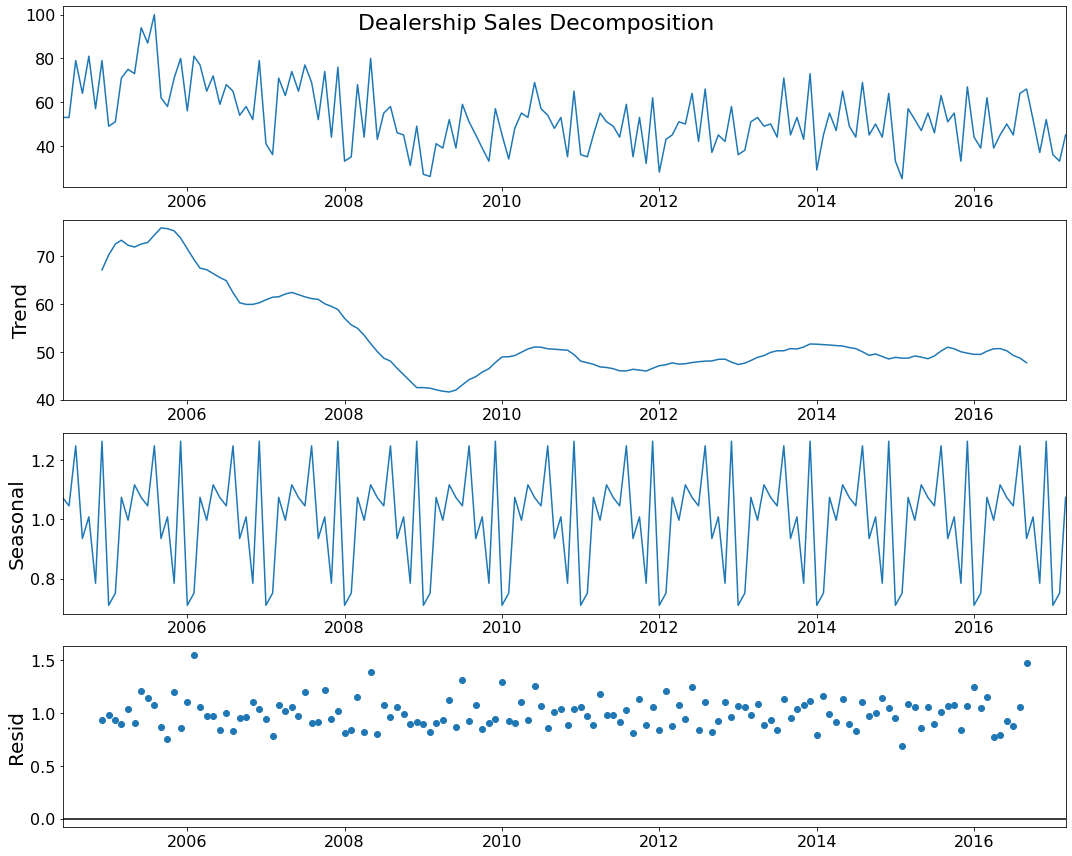

In [16]:
#dealership multiplicative model decomposition plot
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(df_total_sales2, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Dealership Sales Decomposition', fontsize=22)

In the first plot we see again the time plot created earlier in section 3.5.1.1 for the dealership's total sales. Next, is a plot of the trend. We can see a downward trend beginning in late 2005 through 2009. There is a climbing and dropping frequency that occurs every two years between 2010 through 2016, with 2010 having a increasing fluctuation. The seasonal plot shows there is a pattern that occurs every two years and the residual plot shows high variance in the early and late years of this time series.

#### 3.5.3.2 Lexus Time Series Decomposition

In [17]:
#convert "df_total_sales" ContractYearMonth to a pandas DatetimeIndex
lex['ContractYearMonth'] = pd.to_datetime(lex['ContractYearMonth'])
lex2 = lex.set_index('ContractYearMonth')
lex2

,TotalSales
ContractYearMonth,
2004-06-01,37
2004-07-01,35
2004-08-01,60
2004-09-01,44
2004-10-01,58
...,...
2016-11-01,31
2016-12-01,43
2017-01-01,30


Text(0.5, 0.98, 'Lexus Sales Decomposition')

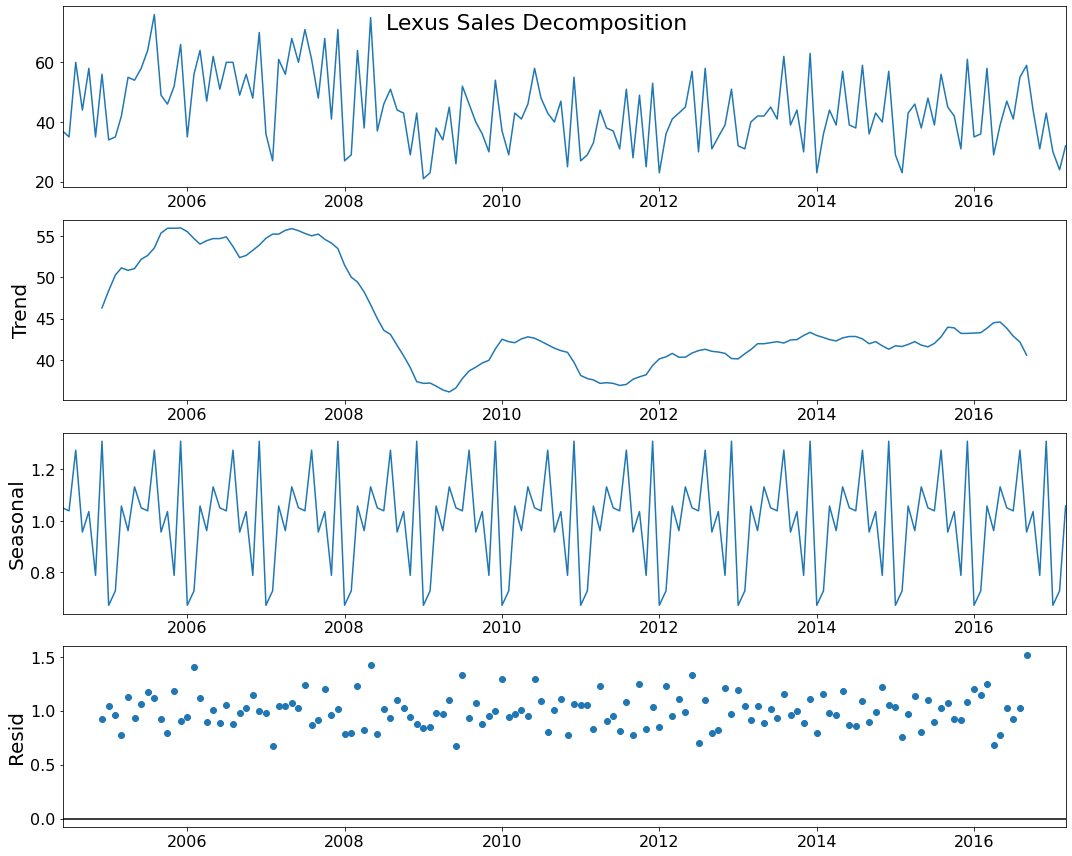

In [18]:
#lexus multiplicative model decomposition plot
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(lex2, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Lexus Sales Decomposition', fontsize=22)

In the first plot we see again the time plot created earlier in section 3.5.1.2 for Lexus'  total sales displaying many highs and lows in the data. Next, is a plot of the trend, which unlike the dealership overall, Lexus appears to have an upward trend through 2005 and doesn't see a significant decline until the end of 2007. We can see this downward trend last through the first two quarters of 2009. Then a climb from the remaining half of 2009 into 2010, followed by a drop throughtout 2011, then finally a very slow climb beginning in 2012 through the remaining of the data in 2016. The lack of data correlating to 2017, introduced a negative trend again, but this can't be confirmed. Notably, the trend never returns to the levels we see prior to 2007 which is similar to the dealership at large. The seasonal plot shows there is a pattern that occurs every year of significant increase followed immediately by significant decrease. Lastly, the residual plot shows high variance every two years, except in 2014 and very low variance in 2007, 2009, 2012, and 2016.

### 3.5.4 Examining Top Vehicle Makes and Models

Since we are analyzing the historical sales data from a Lexus dealership exploring which vehicle brands and models make up the majority of sales is necessary in understanding the makeup of this dataset.

In [19]:
#find VehicleMake with the highest sales
shc['VehicleMake'].value_counts().nlargest(10)

Lexus            6825
Toyota            209
Honda              96
Mercedes-Benz      87
Ford               84
Chevrolet          78
BMW                76
Cadillac           72
Jeep               71
Nissan             63
Name: VehicleMake, dtype: int64

The top ten highest selling vehicles by make are listed above. Lexus makes up the majority of overall dealership sales. Number one is Lexus, which is the brand owner of the dealership where this data was collected from. In second place is Lexus' mothership company Toyota. From personal experience I know many Lexus owners began as Toyota owners and eventually became Lexus owners. The next three slots are close in sales, but Honda leads the pack. Understanding why Honda leads will not be explored in this notebook, but is interesting observation to explore further. Now, let's explore which vehicle models make up the majority of sales for this dealership.

In [20]:
#find VehicleModel with the highest sales
shc['VehicleModel'].value_counts().nlargest(10)

RX 350     2033
ES 350     1016
RX 330      551
IS 250      388
ES 330      323
GX 470      302
LS 460      250
GX 460      209
RX 400h     204
LS 430      196
Name: VehicleModel, dtype: int64

The top ten highest selling vehicle models for the dealership belong to the vehicle make Lexus. In first place is the RX350 which is the smallest SUV offered during this time period. Next, is the ES350 which is Lexus' mid-sized sedan. The next three positions belong to the RX SUV again and two sedans, IS250 and ES330, all of which are at the lowest trim level offered for that specific model. 

## 3.6 Statistical Inference

The scientific question to be explored now is **"Whether or not there's an association between the years provided in the historical sales data for the dealership and the number of units sold yearly?"**


The hypothesis to test are: 
**Ho = every year = same average number of sales, Ha = every year != same average number of sales**

Since this dataset contains all recorded sales for this particular dealership during the given time period, we therefore have all recorded oservations from the target population. As a result, there is no need for random sampling, which is used to make assumptions about the target population.

In [21]:
#extract ContractYear and TotalSales from dealership dataset
yearly = df_ts_yr_mnth.iloc[:,[2,1]]
yearly

,ContractYear,TotalSales
0,2004,53
1,2004,53
2,2004,79
3,2004,64
4,2004,81
...,...,...
149,2016,37
150,2016,52
151,2017,36
152,2017,33


In [22]:
#convert yearly to a DataFrame
yearly2 = pd.DataFrame(yearly)
#Convert the column of years into str obj so not to be observed numerically
yearly2['ContractYear'] = yearly2['ContractYear'].apply(str)
#confirm transformation of column
yearly2['ContractYear'].dtype

dtype('O')

Now, let's measure the variation between the sample means.

In [23]:
yearly2.groupby('ContractYear').mean()

,TotalSales
ContractYear,
2004,66.571429
2005,72.583333
2006,65.500000
2007,61.833333
2008,48.916667
2009,42.333333
2010,51.333333
2011,46.333333
2012,47.583333


We can see 2005 was the strongest year for sales with an average of 72.5 sales and 2017 was the weakest year for sales with an average of 38 sales. The question still remains, **are the differences among the years due to statistically significant differences among the population mean or merely due to insignificant variablility?** One-Way ANOVA F-test will assist in answering this question.

### 3.6.1 One-Way ANOVA F-test

In [24]:
lm = ols('TotalSales ~ ContractYear',data=yearly2).fit()
table = sm.stats.anova_lm(lm)
print(table)

                 df        sum_sq     mean_sq         F        PR(>F)
ContractYear   13.0  12363.545455  951.041958  6.556096  1.197142e-09
Residual      140.0  20308.714286  145.062245       NaN           NaN


The null hypothesis states that the mean of all groups is equal, which implies that our model has no explanatory value and that there is no proof for choosing one year over another. The alternative hypothesis states that at least one of the means is different, which would be a reason to go more in-depth and find out which year is weakest or strongest and why. 

Our p-value of 1.197142e-09 as a real number is 0.000000001197142. This is significantly lower than 0.05, so **we can reject our null hypothesis and accept our alternative hypothesis: stating that at least one of the means is different and that there is an association between the year of sales and the number units sold yearly.** To answer statistically which of the years differ the most in sales performance and which are similar, a post-hoc comparsion test will be performed.  

Post-hoc tests assume the distribution of observations is a fairly normal distribution. To confirm if this is true for the dataset, we will use a histogram to visualize the distribution and then perform any necessary transformations.

#### 3.6.1.1 Exploring Distribution of Observations

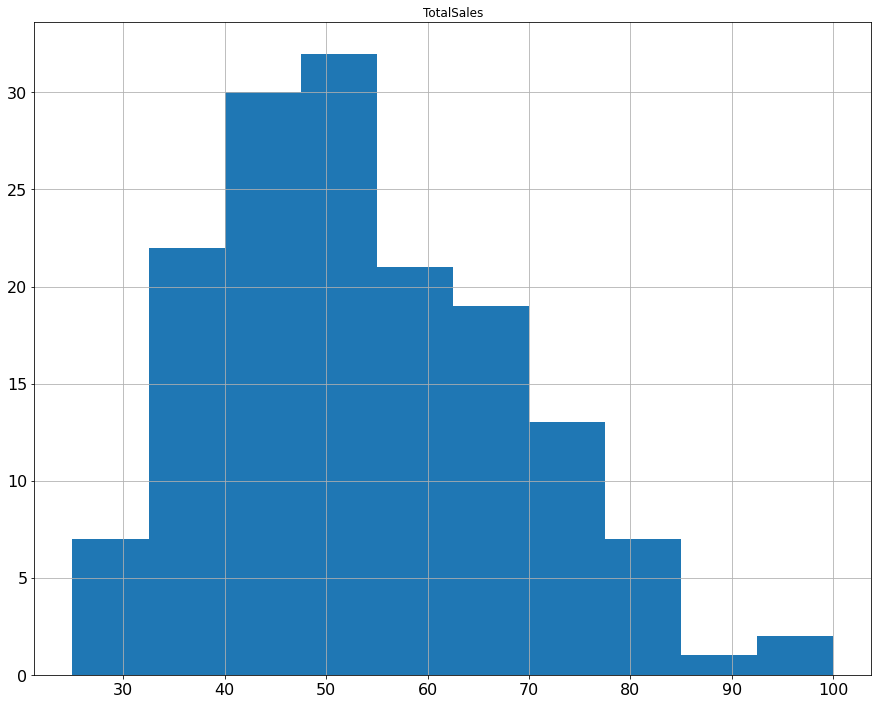

In [25]:
#histogram of distribution yearly 
yearly2.hist()
plt.show()

We can see from the histogram that the shape of the distribution of observations appears to be a right-skewed distribution. That is to say the mean is to the right of the median. Therefore, we will need to transform the distribution of observations closer to a normal distribution. To do so, we will use two methods and compare their results.

#### Log Transformation

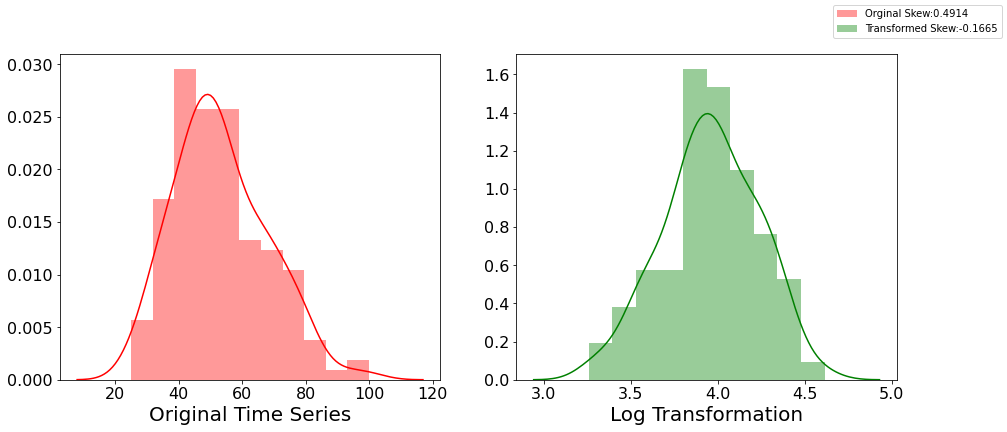

In [26]:
log_target = np.log1p(yearly['TotalSales'])
plt.rcParams["figure.figsize"] = 15,6
fig, ax = plt.subplots(1,2)
sns.distplot(yearly['TotalSales'], label= "Orginal Skew:{0}".format(np.round(skew(yearly['TotalSales']),4)), color="r", ax=ax[0], axlabel="Original Time Series")
sns.distplot(log_target, label= "Transformed Skew:{0}".format(np.round(skew(log_target),4)), color="g", ax=ax[1], axlabel="Log Transformation")
fig.legend()

The above plots are the comparison of the original distribution and the log transformation of the distribution. Log transformations are effective at removing exponential variance from time series data and we can see this through the reducuction in skewness from 0.4914 (red) to -0.1665 (green). Note, the best skew value should be nearly zero. Now, let's compare the results of a box-cox transformation.

#### Box-Cox Transformation

The best lambda is 0.2519673728602007


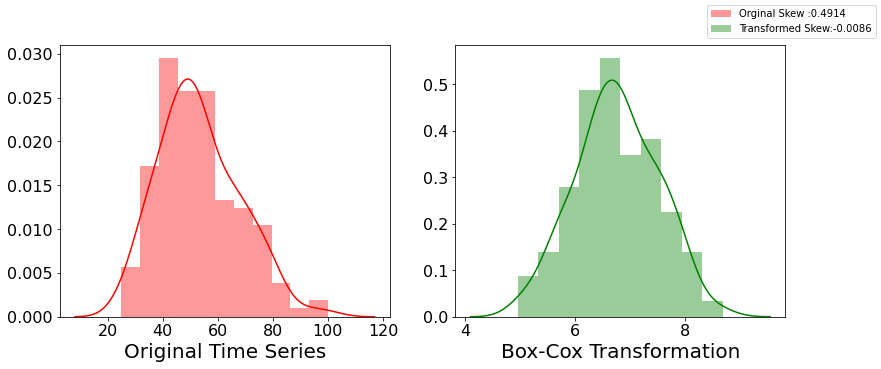

In [27]:
bcx_target, lam = boxcox(yearly['TotalSales'])

plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(yearly['TotalSales'], label= "Orginal Skew :{0}".format(np.round(skew(yearly['TotalSales']),4)), color="r", ax=ax[0], axlabel="Original Time Series")
sns.distplot(bcx_target, label= "Transformed Skew:{0}".format(np.round(skew(bcx_target),4)), color="g", ax=ax[1], axlabel="Box-Cox Transformation")
fig.legend()
print('The best lambda is ' + str(lam)) #lam is the best lambda for the distribution


The above plots are the comparison of the original distribution and the box-cox transformation of the distribution. Box-Cox transformation considers all the values of lambda (from -5 to 5) and the best value for the data is selected. The “Best” value is one that results in the best skewness of the distribution. From the print output we can see the best lambda is 0.2519673728602007, which is between a log transform lamda value of 0.0 and a square root transform lambda value of 0.5. In conclusion, we can see from the legend that the original skew has been reduced from 0.4914 (red) to -0.0086 (green) with the box-cox transformation. As a result, **the box-cox transformation of the dataset has proven to have the best results** and therefore will be used as the transformed dataset for our post-hoc test.

### 3.6.2 Post-Hoc Test: Tukey's Honestly Significant Difference Test (Tukey HSD)

When the explanatory variable is more than two groups, a significant ANOVA does not tell us which groups are different from the others. This is the case for this time series.

The Tukey’s Test is one of the most commonly used post-hoc tests, which allows pairwise comparisons between the means of each group while controlling for the family-wise error rate. This method tests at P<0.05 (correcting for the fact that multiple comparisons are being made which would normally increase the probability of a significant difference being identified). 

For this project, each year within the dataset will be considered a seperate group (explanatory variables) and the total number of vehicles sold for each corresponding year will be the response variable. The difference observed between any given two years will be stated as "False", meaning the acceptance of the null hypothesis or "True" meaning the rejection of the null hypothesis. 

The hypothesises for this test are the following:
**Ho = there is no significant difference observed;
Ha = a significant difference has been observed**

In [28]:
#set up the data for comparison using the box-cox version of the yearly dealership sales
multiComp = MultiComparison(bcx_target, yearly['ContractYear'])
#print the comparisons
print(multiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2004   2005   0.2359    0.9  -0.783  1.2548  False
  2004   2006  -0.0352    0.9 -1.0541  0.9837  False
  2004   2007  -0.2389    0.9 -1.2578    0.78  False
  2004   2008   -0.895 0.1514 -1.9139  0.1239  False
  2004   2009  -1.2583 0.0034 -2.2771 -0.2394   True
  2004   2010  -0.7303 0.4565 -1.7492  0.2886  False
  2004   2011  -1.0076 0.0559 -2.0265  0.0113  False
  2004   2012  -0.9426 0.1016 -1.9615  0.0763  False
  2004   2013  -0.7783 0.3465 -1.7972  0.2406  False
  2004   2014  -0.7816 0.3393 -1.8005  0.2373  False
  2004   2015  -0.9043 0.1401 -1.9232  0.1146  False
  2004   2016  -0.8198 0.2648 -1.8387  0.1991  False
  2004   2017  -1.4879 0.0469 -2.9662 -0.0095   True
  2005   2006   -0.271    0.9 -1.1457  0.6036  False
  2005   2007  -0.4748 0.8278 -1.3494  0.3998  False
  2005   2008  -1.1309 0.0016 -2.0055 -0.2563 

As a result of the Tukey HSD Test we can see the differences and similarties between all the years within this time series. Notably are the "True" outputs observed within the "reject" column, which state there is a significant difference observed between the correlating group1 and group2. In addition, the column "meandiff" states the mean difference between the two groups. 

In this regard, when 2004 is put in contrast to 2009 and 2017 these two years are "True" for the rejection of the null hypothesis and the significant difference observed is a negative mean difference. Therefore, 2009 and 2017 are years that have a significant decline in sales when compared to sales observed in 2004. 

Then when 2005 was examined in comparison to 2008 through 2017, they also reject the null hypothesis, with an output of "True", and the significant difference observed is also a negative mean difference. It's to be noted that 2005 when compared with 2006 and 2007 also show a negative mean difference, but with a p-value adjusted ("p-adj") greater than 0.05. Therefore, the null hypothesis cannot be rejected in these cases. The only positive mean difference observed between 2005 and another year is 2004. This observations make sense, since 2005 has the highest number of total sales within this time series.

Next, 2006 in comparison to 2009, 2011, 2012 and 2017, all reject the null hypothesis as well for the same reasons stated. Finally, 2007 in comparison to 2009 rejects the null hypothesis as well.

As a result, **we can now statistically confirm 2009 has the most statistically significant difference (negatively) in sales performance in comparison to 2004 through 2007 and 2017 also has a notable statistically significant difference (negatively) in sales performance in comparison to 2004 through 2006 (whom have the highest sales performance, especially 2005)**. 

This is not to say 2009 has the lowest number of sales in this time series, that is 2017, but rather it is the most frequent year to have a significant difference (negatively) when compared to 2004 through 2007. 

Lastly, 2013 and 2014 are the most statistically similar with -0.0033 mean differance. As well as, 2008 and 2015 with -0.0093 mean difference.

### 3.6.3 Augmented Dickey Fuller (ADF) Test

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the time series is stationary or non-stationary data.

The null and alternate hypothesis of this test are:

**Ho: The series has a unit root; Ha: The series has no unit root.**

If the null hypothesis fails to be rejected, this test may provide evidence that the series is non-stationary. To perform this test the full historical sales data will be used. 

#### Dealership ADF Test

In [29]:
#perform ADFuller test on dealership df containing year and month of sales
result = adfuller(df_total_sales['TotalSales'].ffill(0))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.586742
p-value: 0.095768
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578


Since the p-value = 0.095768 is greater than the significance level [0.05], therefore the null hypothesis cannot be rejected and the time series appears non-stationary. Let's run a second test to confirm that the time series is non-stationarity.

#### Lexus ADF Test

In [30]:
#perform ADFuller test on Lexus df containing year and month of sales
result = adfuller(lex['TotalSales'].ffill(0))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.786583
p-value: 0.387143
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578


Since the p-value = 0.387143 is greater than the significance level [0.05], therefore the null hypothesis cannot be rejected and the time series appears also non-stationary. 

### 3.6.4 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

KPSS test is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.
**Ho: The process is trend stationary.
Ha: The series has a unit root (series is not stationary).

#### Dealership KPSS Test

In [31]:
#perform kpss test on dealership df containing year and month of sales
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(df_total_sales['TotalSales'])

Results of KPSS Test:
Test Statistic           1.007066
p-value                  0.010000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/martelltardy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Based upon the significance level of 0.05 and the p-value of KPSS test (0.010000), there is evidence for **rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test.** 

#### Lexus KPSS Test

In [32]:
#perform kpss test on lexus df containing year and month of sales
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(lex['TotalSales'])

Results of KPSS Test:
Test Statistic           0.847231
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/martelltardy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Based upon the significance level of 0.05 and the p-value of KPSS test (0.010000), there is evidence for **rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test.**

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Now, we will move forward with finding the order of differencing.

### 3.6.5 Handling Heteroskedasticity

To make the time series stationary, we need to apply transformations to it. Since box-cox transformation was applied on the yearly distribution and signifcantly reduced skewness, the same transformation will be applied to the dealership (df = df_total_sales['TotalSales']) and the Lexus (df = df_total_sales['TotalSales']) datasets to remove heteroskedasticity.

#### Dealership Box-Cox Transformation

The best lambda is 0.2519673728602007


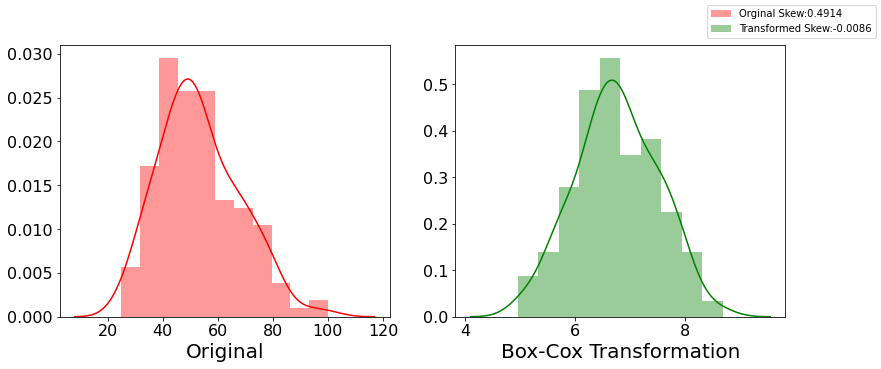

In [33]:
bcx_dlrshp, lam = boxcox(df_total_sales['TotalSales'])

plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df_total_sales['TotalSales'], label= "Orginal Skew:{0}".format(np.round(skew(df_total_sales['TotalSales']),4)), color="r", ax=ax[0], axlabel="Original")
sns.distplot(bcx_dlrshp, label= "Transformed Skew:{0}".format(np.round(skew(bcx_dlrshp),4)), color="g", ax=ax[1], axlabel="Box-Cox Transformation")
fig.legend()
print('The best lambda is ' + str(lam)) #lam is the best lambda for the distribution

From the print output we can see the best lambda is 0.2519673728602007 again, which is between a log transform lamda value of 0.0 and a square root transform lambda value of 0.5. 

In conclusion, we can see from the legend that the original skew has been reduced from 0.4914 (red) to -0.0086 (green) with the box-cox transformation and therefore handling heteroskedasticity.

#### Lexus Box-Cox Transformation

The best lambda is 0.3542288312735581


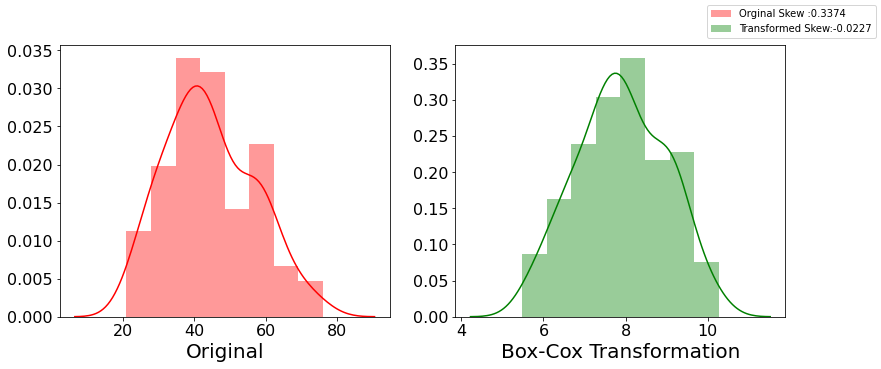

In [34]:
bcx_lexus, lam = boxcox(lex['TotalSales'])

plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(lex['TotalSales'], label= "Orginal Skew :{0}".format(np.round(skew(lex['TotalSales']),4)), color="r", ax=ax[0], axlabel="Original")
sns.distplot(bcx_lexus, label= "Transformed Skew:{0}".format(np.round(skew(bcx_lexus),4)), color="g", ax=ax[1], axlabel="Box-Cox Transformation")
fig.legend()
print('The best lambda is ' + str(lam)) #lam is the best lambda for the distribution

From the print output we can see the best lambda is 0.3542288312735581, which is between a log transform lamda value of 0.0 and a square root transform lambda value of 0.5. 

In conclusion, we can see from the legend that the original skew has been reduced from 0.3374 (red) to -0.0227 (green) as well with the box-cox transformation and therefore handling heteroskedasticity.

### 3.6.6 Removing Trends

A trend makes a time series non-stationary by increasing the level. This has the effect of varying the mean time series value over time. Lets continue to make the time series stationary by plotting multiple trend lines to find the best fit.

#### Dealership Trend Analysis

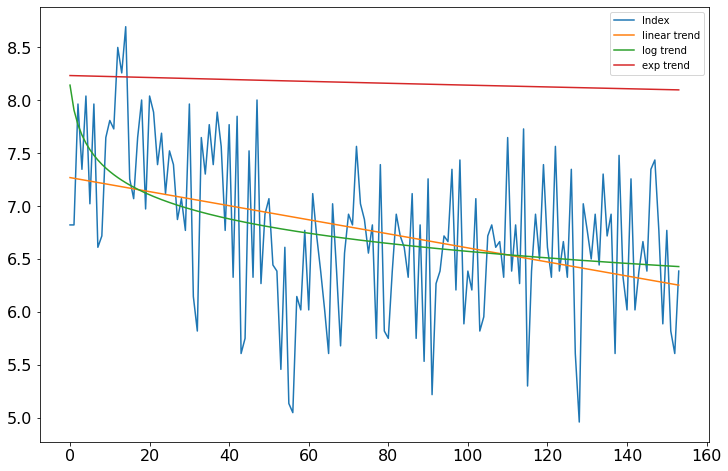

In [35]:
X = np.array(range(len(bcx_dlrshp)))
y = bcx_dlrshp

#Linear trend
reg = LinearRegression().fit(X.reshape(-1,1), y)
pred_lin = reg.predict(X.reshape(-1,1))  

#Logarithmic trend
a_1,b_1 = np.polyfit(np.log(X+1), y, 1)
pred_log = a_1 * np.log(X+1) + b_1

#Exponential trend
a_2,b_2 = np.polyfit(X+1, np.log(y), 1)
pred_exp = np.exp(b_2) + np.exp( (X+1) * a_2)

plt.figure(figsize=(12,8))
plt.plot((bcx_dlrshp), label="Index")
plt.plot(df_total_sales['TotalSales'].index, pred_lin, label="linear trend")
plt.plot(df_total_sales['TotalSales'].index, pred_log, label="log trend")
plt.plot(df_total_sales['TotalSales'].index, pred_exp, label="exp trend")
plt.legend()
plt.show()

The logarithmic trend is the best fit in this case. Therefore, our new time series becomes: (bcx_dlrshp - logarithmic trend).

#### Lexus Trend Analysis

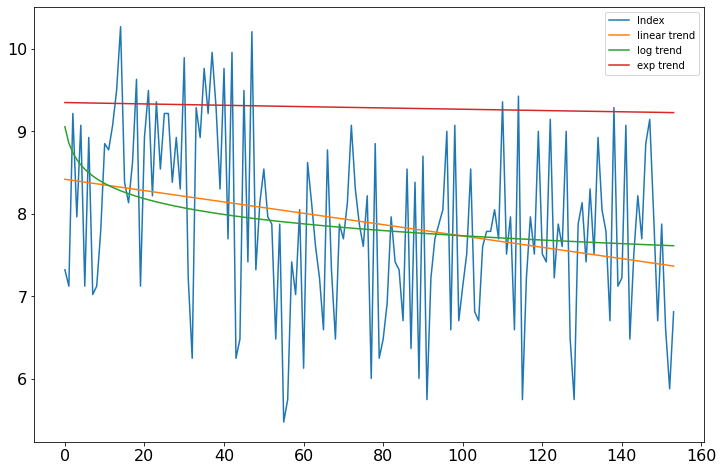

In [36]:
X = np.array(range(len(bcx_lexus)))
y = bcx_lexus

#Linear trend
reg = LinearRegression().fit(X.reshape(-1,1), y)
pred_lin = reg.predict(X.reshape(-1,1))  

#Logarithmic trend
a_1,b_1 = np.polyfit(np.log(X+1), y, 1)
pred_log = a_1 * np.log(X+1) + b_1

#Exponential trend
a_2,b_2 = np.polyfit(X+1, np.log(y), 1)
pred_exp = np.exp(b_2) + np.exp( (X+1) * a_2)

plt.figure(figsize=(12,8))
plt.plot((bcx_lexus), label="Index")
plt.plot(lex['TotalSales'].index, pred_lin, label="linear trend")
plt.plot(lex['TotalSales'].index, pred_log, label="log trend")
plt.plot(lex['TotalSales'].index, pred_exp, label="exp trend")
plt.legend()
plt.show()

The logarithmic trend is the best fit in this case. Therefore, our new time series becomes: (bcx_lexus - logarithmic trend). Now, lets apply this insight to new time series.

#### Removal of Logarithmic Trend

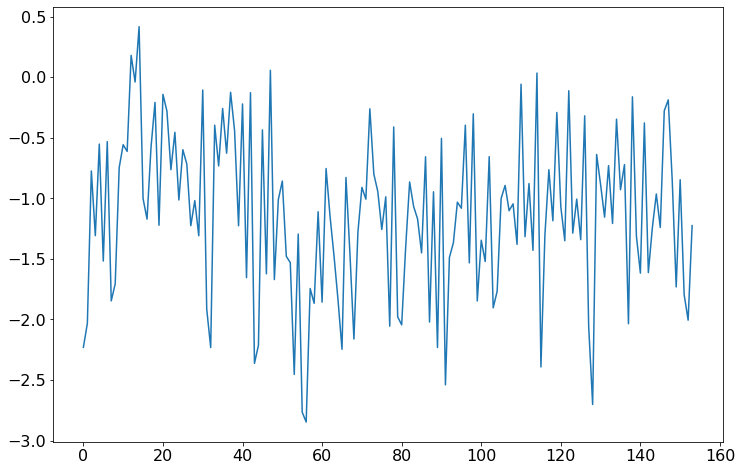

In [37]:
#removal of logarithmic trend for dealership df
d = (bcx_dlrshp-pred_log)
plt.figure(figsize=(12,8))
plt.plot(d)
plt.show()

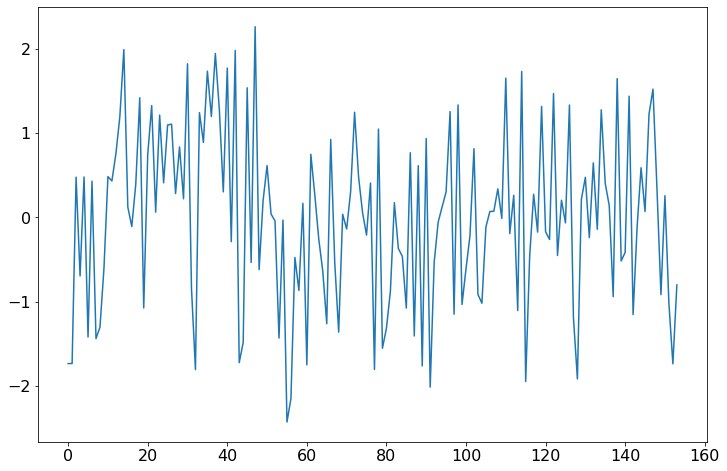

In [38]:
#removal of logarithmic trend for Lexus df
l = (bcx_lexus-pred_log)
plt.figure(figsize=(12,8))
plt.plot(l)
plt.show()

### 3.6.7 Removing Seasonality

Seasonality in time series denotes a recurrent pattern over time. When a series is seasonal, it means that value at a given point in the past is really close to the value we observe today. In the graph above, it seems to be the case. 

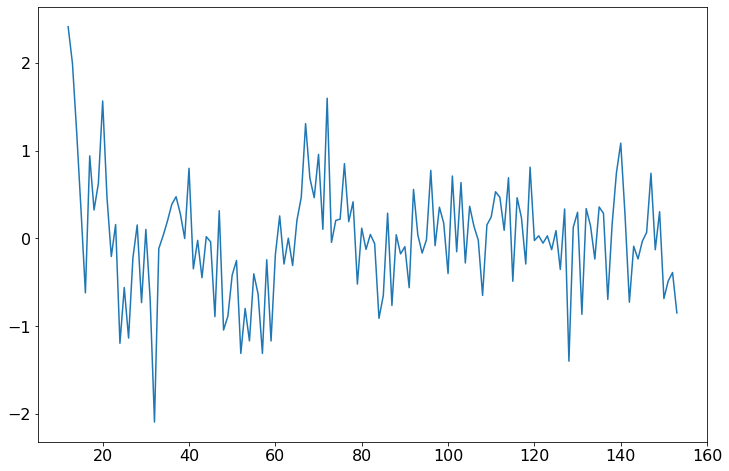

In [39]:
#convert array to series for dealership(d)
d_series = pd.Series(d)
#applying difference transformation
plt.figure(figsize=(12,8))
plt.plot(d_series - d_series.shift(12))
plt.show()

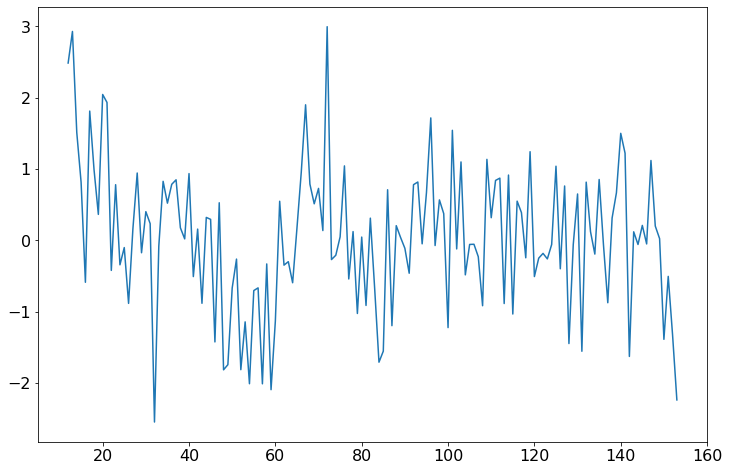

In [40]:
#convert array to series for Lexus(l)
l_series = pd.Series(l)
#applying difference transformation
plt.figure(figsize=(12,8))
plt.plot(l_series - l_series.shift(12))
plt.show()

We have removed most of the trend here, and remain with a stationary series. To make sure that our series is stationary, we can look at the plot: There seems to be no recurrent pattern in the data, constant variance and mean, no trend. So, lets compute the ADFuller test again to confirm.

In [41]:
#2nd ADFuller Test for dealership(d_series)
d_stationary = d_series - d_series.shift(12)
result = adfuller(d_stationary.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.258796
p-value: 0.000523
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


In [42]:
#2nd ADFuller Test for lexus(l_series)
l_stationary = l_series - l_series.shift(12)
result = adfuller(l_stationary.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.149738
p-value: 0.000801
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


The p-value for both ADF tests are basically 0, and the ADF Statistic is below the 1% critical value for both the dealership and Lexus related datasets. We can now **reject the null hypothesis that the series has a unit root and is not stationary. Therefore, these time series are now stationary and ready for modeling.**

## 3.7 Save File

In [43]:
#save time series 
d_stationary.to_pickle('../data/processed/dlrshp_stationary.pkl')
l_stationary.to_pickle('../data/processed/lexus_stationary.pkl')

## 3.8 Summary

The exploratory data analysis of the Historical Sales Dataset was explored as a whole representing the dealership's total sales and at the brand level, focusing on Lexus as the . number one selling brand for the dealership. Through this layered analysis it is confirmed that the year 2009 had the most statistically significant difference (negatively) in sales performance in comparison to 2004 through 2007. 2017 also has a notable statistically significant difference (negatively) in sales performance in comparison to 2004 through 2006 (whom have the highest sales performance, especially 2005). In addition, 2013 and 2014 are the most statistically similar with -0.0033 mean differance. As well as, 2008 and 2015 with -0.0093 mean difference.

Overall, the Seasonality of the time series is downward which was most clearly observed through a multiplicative model decomposition plot in section 3.5.3. This seasonality displays a clear downward trend yearly beginning in 2006 and a clear increasing fluctuantion seasonally throughout the first two quarters of the year for the sale of all dealership vehicles. However, there is a clear downward trend yearly beginning in 2008 and a clear increasing fluctuantion seasonally throughout the year for the sale of Lexus vehicles.

During the analysis of sales performance by vehicle make, in section 3.5.4, Lexus is confirmed to statistically be the highest selling vehicle make in this time series. Within the Lexus brand model types "RX 350", "ES 350", and "RX 330" are the top three selling models in that order. 

Finally, this time series is now stationary and is ready for modeling. The time series dataframe has been transformed within this notebook and saved as two seperate time series objects. The first contains the total sales for the dealership, titled "dlrshp_stationary", and the second contains the total sales for Lexus vehicles only, titled "lexus_stationary", both in pickle formatting for panadas objects. 